In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("train_preprocessed.csv")
test = pd.read_csv("test_preprocessed.csv")
sample = pd.read_csv("sample_submission_8RXa3c6.csv")

In [3]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [4]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifer_code_DR,Item_Identifer_code_FD,Item_Identifer_code_NC,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,-0.751014,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDA15,OUT049,3735.1380
1,-1.477653,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,0,1,0,1,0,0,DRC01,OUT018,443.4228
2,1.011839,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDN15,OUT049,2097.2700
3,1.377308,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,1,0,0,0,0,1,0,FDX07,OUT010,732.3800
4,-0.830557,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,1,0,0,0,0,1,NCD19,OUT013,994.7052


In [5]:
X = train.drop(columns = ["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier"])
y = train['Item_Outlet_Sales']

In [6]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifer_code_DR,Item_Identifer_code_FD,Item_Identifer_code_NC
0,-0.751014,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.477653,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1.011839,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.377308,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.830557,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [7]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state=32)

In [9]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [10]:
model.coef_

array([ 5.75271882e+00,  2.62408107e+00,  9.78587692e+02, -1.44730683e+15,
        1.08663199e+16,  1.08663199e+16, -5.99082004e+14, -5.99082004e+14,
       -5.99082004e+14, -5.99082004e+14, -5.99082004e+14, -5.99082004e+14,
       -5.99082004e+14, -5.99082004e+14,  1.10637101e+15,  1.10637101e+15,
       -5.99082004e+14,  1.10637101e+15, -5.99082004e+14, -5.99082004e+14,
       -5.99082004e+14, -5.99082004e+14,  9.98134972e+14,  2.82597063e+15,
       -1.76651455e+14, -6.45554161e+14,  4.01445569e+14,  2.95832822e+14,
        3.42011669e+14,  6.87787085e+14, -1.78943253e+15, -2.52790680e+14,
       -1.14465519e+15, -2.98477598e+15, -1.10235871e+15,  2.47975734e+15,
       -8.61900814e+14, -3.64472263e+14, -1.39531829e+15, -1.27909269e+15,
        2.29023323e+14,  3.43694133e+15,  1.66072518e+15,  1.66072518e+15,
       -4.47278404e+13])

In [11]:
model.intercept_

-1.0093221886477888e+16

In [12]:
train_y_pred = model.predict(train_X)
test_y_pred = model.predict(test_X)

#actual test data from hackathon
test_pred = model.predict(test.drop(columns = ["Item_Identifier", "Outlet_Identifier"]))

In [13]:
print(test_pred)

[1834. 1462. 1868. ... 1866. 3662. 1366.]


In [14]:
df = pd.DataFrame(test_pred, columns=['pred'])
df

,pred
0,1834.0
1,1462.0
2,1868.0
3,2546.0
4,5166.0
...,...
5676,2326.0
5677,2392.0
5678,1866.0
5679,3662.0


In [15]:
train_X_RMSE = np.sqrt(mean_squared_error(train_y, train_y_pred))
test_X_RMSE = np.sqrt(mean_squared_error(test_y, test_y_pred))

In [16]:
print("Train RMSE : ",train_X_RMSE)
print("Test RMSE : ",test_X_RMSE)

Train RMSE :  1126.6189389598026
Test RMSE :  1138.5954556100382


In [17]:
train_X_R2 = r2_score(train_y, train_y_pred)
test_X_R2 = r2_score(test_y, test_y_pred)

In [18]:
print("Train R2 : ",train_X_R2)
print("Test R2 : ",test_X_R2)

Train R2 :  0.5633180170670414
Test R2 :  0.5577931232527753


In [19]:
test_pred_modified = np.where(test_pred<0,0,test_pred)

In [20]:
#test_pred_modified = np.abs(test_pred)

In [21]:
test['Item_Outlet_Sales'] = test_pred_modified

In [22]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifer_code_DR,Item_Identifer_code_FD,Item_Identifer_code_NC,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,1.710530,-1.134699,-0.533831,-0.139681,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDW58,OUT049,1834.0
1,-0.965996,-0.534917,-0.864708,-1.095319,0,1,0,0,0,0,...,0,1,0,0,0,1,0,FDW14,OUT017,1462.0
2,0.388391,0.653405,1.622763,-0.020226,1,0,0,0,0,0,...,1,0,0,0,0,0,1,NCN55,OUT010,1868.0
3,-1.177753,-0.982657,0.225966,-1.095319,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDQ58,OUT017,2546.0
4,0.173409,1.023121,1.501577,1.532686,0,1,0,0,0,0,...,0,0,0,1,0,1,0,FDY38,OUT027,5166.0


In [23]:
Output = test[[ "Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]]

In [24]:
Output

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1834.0
1,FDW14,OUT017,1462.0
2,NCN55,OUT010,1868.0
3,FDQ58,OUT017,2546.0
4,FDY38,OUT027,5166.0
...,...,...,...
5676,FDB58,OUT046,2326.0
5677,FDD47,OUT018,2392.0
5678,NCO17,OUT045,1866.0
5679,FDJ26,OUT017,3662.0


In [25]:
Output.to_csv("Result_Linear_Regression_with_80percent_traindata_abs.csv", index = False)

In [26]:
def model_predict(model, train_X,train_y,test,filename):

    train_pred = model.predict(train_X)
    test_pred = model.predict(test.drop(columns = ["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]))
    train_RMSE = np.sqrt(mean_squared_error(train_y, train_pred))
    print("Train RMSE : ",train_RMSE)
    train_R2 = r2_score(train_y, train_pred)
    print("Train R2 : ",train_R2)
    test_pred_modified = np.where(test_pred<0,0,test_pred)
    test['Item_Outlet_Sales'] = test_pred_modified
    Output = test[[ "Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]]
    Output.to_csv(filename, index = False)

In [27]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [28]:
model_predict(model, X,y,test,"Result_LR_fulltrain_model.csv")

Train RMSE :  1127.0357631593322
Train R2 :  0.5637715725594881


In [29]:
from tqdm import tqdm
res_rmse = []
for i in tqdm(range(1,50)):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(train_X, train_y)
    test_pred = model.predict(test_X)
    test_X_RMSE = np.sqrt(mean_squared_error(test_y, test_pred))
    res_rmse.append(test_X_RMSE)


100%|██████████| 49/49 [00:23<00:00,  2.05it/s]


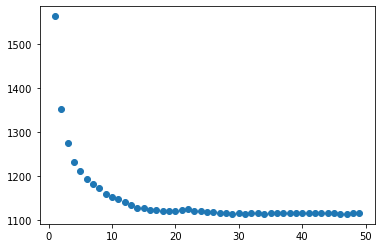

In [30]:
plt.scatter(range(1,50),res_rmse)

In [31]:
model = KNeighborsRegressor(n_neighbors=17)
model.fit(X, y)

KNeighborsRegressor(n_neighbors=17)

In [32]:
model_predict(model, X,y,test,"Result_KNN_fulltrain_model.csv")

Train RMSE :  1069.6142399316077
Train R2 :  0.6070901457128928


In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
poly= PolynomialFeatures(degree=3, include_bias=False)
poly_train_x = poly.fit_transform(X)
poly_test_x = poly.fit_transform(test.drop(columns = ["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]))

In [35]:
def model_predict_poly(model, train_X,train_y,test,test_actual,filename):

    train_pred = model.predict(train_X)
    test_pred = model.predict(test)
    train_RMSE = np.sqrt(mean_squared_error(train_y, train_pred))
    print("Train RMSE : ",train_RMSE)
    train_R2 = r2_score(train_y, train_pred)
    print("Train R2 : ",train_R2)
    test_pred_modified = np.where(test_pred<0,0,test_pred)
    test_actual['Item_Outlet_Sales'] = test_pred_modified
    Output = test_actual[[ "Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]]
    Output.to_csv(filename, index = False)

In [36]:
model = LinearRegression()
model.fit(poly_train_x, y)
model_predict_poly(model, poly_train_x,y,poly_test_x,test,"Res_poly_fulltrain_degree_3.csv")

Train RMSE :  1007.8449192046736
Train R2 :  0.6511602308106541
